Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan
#gr(size=(600,600));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64,Float64,Float64,Int64
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at string:15
└ @ Core ./string:15


,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-220.326,-229.958,1.17648e-67
2,140.151,4.0,-217.486,-227.103,2.0424e-66
3,140.302,4.0,-214.675,-224.278,3.44616e-65
4,140.452,4.0,-211.891,-221.48,5.65155e-64
5,140.603,4.0,-209.137,-218.712,9.0082e-63
6,140.754,4.0,-206.411,-215.971,1.39555e-61
7,140.905,4.0,-203.713,-213.259,2.10132e-60
8,141.055,4.0,-201.043,-210.576,3.07521e-59
9,141.206,4.0,-198.402,-207.921,4.37418e-58


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at string:1
└ @ Core string:1


,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,152.663,8.34171,-68.7834,-77.4125,0.208967
2,154.623,7.61809,-67.5416,-76.0514,0.815086
3,152.362,7.37688,-68.8406,-77.4889,0.193601
4,154.322,6.81407,-67.5357,-76.0632,0.805535
5,155.528,6.33166,-67.6389,-76.0968,0.778899
6,155.528,6.17085,-67.7764,-76.2343,0.678853
7,158.241,6.41206,-69.8786,-78.1933,0.095721
8,153.869,8.0201,-67.9451,-76.4996,0.520659
9,153.266,7.9397,-68.2068,-76.7982,0.386269


### Snippet 4.23

Density of sigma

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at string:1
└ @ Core string:1


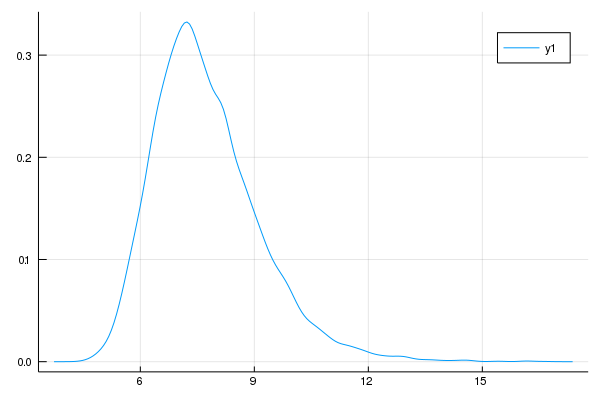

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*